# AB-тестирование
## Задание AB.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 40 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 60 баллов.

----


In [227]:
# Bot check

# HW_ID: ds_ab6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
from enum import Enum
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import statsmodels.api as sm
from statsmodels.stats import multitest
from statsmodels.stats.proportion import proportion_confint
from statsmodels.formula.api import ols

from statsmodels.stats.multitest import multipletests

import scikit_posthocs as sp

from itertools import product

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pof

from statsmodels.stats.multicomp import pairwise_tukeyhsd

from itertools import combinations
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf


import seaborn as sns

from sklearn.preprocessing import LabelEncoder

sns.set(style="darkgrid", font_scale=1, palette="Set2")

# параллельные вычисления
from joblib import Parallel, delayed

import warnings

warnings.filterwarnings("ignore")
# отключает FutureWarning и при параллельном вычислении
import os
from IPython.display import display

os.environ["PYTHONWARNINGS"] = "ignore::FutureWarning"

---
### Задача 1.

Выберите несколько человек (не менее 5) с DS-потока по состоянию на осенний семестр и сравните их успеваемость методами дисперсионного анализа, рассмотрев оценки по всем заданиям одного типа (ST/SP/ML). Обратите внимание, что в отличии от примера с презентации в данном случае исследуемым фактором является человек, а задание &mdash; мешающий фактор.

In [229]:
data = pd.read_csv("st_hw.csv")
data = data[
    [
        "ДЗ: Статистика теория",
        "Основная сдача",
        "Unnamed: 2",
        "Unnamed: 3",
        "Unnamed: 4",
        "Unnamed: 5",
        "Unnamed: 6",
        "Unnamed: 7",
        "Unnamed: 8",
        "Unnamed: 9",
        "Unnamed: 10",
        "Unnamed: 11",
        "Unnamed: 12",
        "Unnamed: 13",
        "Unnamed: 14",
    ]
]
data.rename(
    columns={
        "ДЗ: Статистика теория": "name",
        "Основная сдача": "ST_1",
        "Unnamed: 2": "ST_2",
        "Unnamed: 3": "ST_3",
        "Unnamed: 4": "ST_4",
        "Unnamed: 5": "ST_5",
        "Unnamed: 6": "ST_6",
        "Unnamed: 7": "ST_7",
        "Unnamed: 8": "ST_8",
        "Unnamed: 9": "ST_9",
        "Unnamed: 10": "ST_10",
        "Unnamed: 11": "ST_11",
        "Unnamed: 12": "ST_12",
        "Unnamed: 13": "ST_13",
        "Unnamed: 14": "ST_14",
    },
    inplace=True,
)
data.drop(index=[0, 1, 2], inplace=True)
data.reset_index(drop=True, inplace=True)
data.dropna(inplace=True)
data.head()

,name,ST_1,ST_2,ST_3,ST_4,ST_5,ST_6,ST_7,ST_8,ST_9,ST_10,ST_11,ST_12,ST_13,ST_14
0,Алимаскина Екатерина,47,33,"66,9",42,"55,5",43,30,63,35,37,36,30,29,22
1,Артюх Никита,47,"30,5","63,5","63,5","55,5","61,5",59,0,31,33,36,30,25,20
2,Беликов Дмитрий,"35,5","21,5","36,9","41,5",77,48,40,67,33,45,40,30,26,18
3,Белинский Тимофей,39,14,"43,5",59,69,"48,5","56,5",59,27,34,31,30,27,0
4,Виноградов Иван,49,51,61,81,71,"65,5","43,5",56,42,39,0,8,27,25


Соберем в длинный формат, для удобства применения ANOVA

In [230]:
data_long = data.melt(id_vars="name", var_name="task_type", value_name="score")
data_long["score"] = data_long["score"].apply(lambda x: float(x.replace(",", ".")))
data_long.head()

,name,task_type,score
0,Алимаскина Екатерина,ST_1,47.0
1,Артюх Никита,ST_1,47.0
2,Беликов Дмитрий,ST_1,35.5
3,Белинский Тимофей,ST_1,39.0
4,Виноградов Иван,ST_1,49.0


In [231]:
data_long["score"] = data_long["score"].astype(float)
data_long["name"] = data_long["name"].astype(str)
data_long["task_type"] = data_long["task_type"].astype(str)

Применим ANOVA

In [232]:
formula = "score ~ C(name) + C(task_type)"
model = smf.ols(formula, data=data_long).fit()
aov_table = sm.stats.anova_lm(model)
print(aov_table.round(3))

                 df      sum_sq    mean_sq       F  PR(>F)
C(name)        54.0   86508.199   1602.004   8.168     0.0
C(task_type)   13.0  146970.437  11305.418  57.645     0.0
Residual      702.0  137676.630    196.121     NaN     NaN


**Выводы** Как видим, различия между студентами значимы, и в то же время гипотеза об отсутствии влияния типа задания на оценку отвергается.

---

### Задача 2.

Используя теорему о разложении гауссовского вектора получите $F$-критерий однофакторного дисперсионного анализа для случая независимых выборок.

$\square$

См pdf

$\blacksquare$

---

### Задача 3.

На занятии разобраны два способа проведения post-hoc анализа для сравнения средних нескольких независимых выборок &mdash; LSD Фишера и HSD Тьюки. 

Какое количество попарных сравнений они производят для $k$ выборок? В чем заявленное преимущество HSD Тьюки?

LSD и HSD производят $\frac{k \cdot (k-1)}{2}$ попарных сравнений

Заявленное преимущество -- нет необходимости в МПГ, тем не менее контролирует FWER.

Опишите процедуру валидации подобно АА-тесту метода HDS Тьюки для $k=4$ выборок одного размера $n$. Какую величину будете оценивать?

Пусть у нас есть 4 выборки. Будем проверять гипотезу о равенстве их матожиданий. Для этого будем брать среднее по выборкам. Опишем процедуру валидации метода HSD Тьюки:

1) Создаем 4 выборки без эффекта между ними.
2) Применяем HSD Тьюки попарно к этим выборками (т.е. всего 6 сравнений)
3) Вычисляем долю случаев, когда гипотезу о равенстве матожиданий была отвергнута и строим д.и.

Все это необходим повторить большое количество раз.

Соответственно оцениваем мы FWER

Реализуйте эту процедуру 
* для нескольких распределений,
* для нескольких значений $n$.

Сначала реализуем требуемый алгоритм

In [3]:
def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(
        n_rejects, n_iter, method="wilson"
    )

    return prob_reject, left_bound, right_bound


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
    title=None,
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)

    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                alpha=0.7,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound],
            [0.15] * 2,
            [-0.15] * 2,
            color="green",
            alpha=0.6,
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim(
            (min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3)
        )
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def draw_power(
    powers,
    left_powers,
    right_powers,
    effects_list=np.linspace(0, 0.1, 11),
    label=None,
    title="Графики мощности",
    new_figure=False,
):
    """
    Построение и отрисовка графика мощности критерия.

    Аргументы:
    effects -- сетка эффектов
    powers -- оценка реальной мощности
    left_powers, right_powers -- границы соотв. дов. интервала
    title -- заголовок графика
    """

    if new_figure:
        plt.figure(figsize=(10, 4))

    plt.plot(effects_list, powers, label=label, lw=3)
    plt.fill_between(effects_list, left_powers, right_powers, alpha=0.3)

    if new_figure:
        plt.hlines(
            0.8,
            effects_list[0],
            effects_list[-1],
            color="black",
            alpha=0.5,
            label="Мощность 0.8 (пересечение — MDE)",
        )
    plt.legend()
    plt.xlabel("Размер эффекта")
    plt.ylabel("Мощность")
    plt.title(title)

def add_effect(samples, effects, target_name="pilot", relative_effect=True):
    """
    Функция искусственного добавления эффекта в тестовые выборки

    Аргументы:
    samples -- выборки, k + 1
    effects -- добавляемые эффекты, k

    Возвращает:
    samples -- выборки с добавленным эффектом, k + 1
    """

    samples_copy = [sample.copy() for sample in samples]

    if relative_effect:
        for sample, effect in zip(samples_copy[1:], effects):
            sample[target_name] *= 1 + effect
    else:
        for sample, effect in zip(samples_copy[1:], effects):
            sample[target_name] += effect

    return samples_copy


def run_1_iteration(
    test,
    generate_samples,
    target_name,
    add_effect,
    effects_list=[0],
    relative_effect=True,
):
    samples = generate_samples()
    pvals = []

    for effects in effects_list:
        samples_cp = add_effect(samples, effects, target_name=target_name, relative_effect=relative_effect)
        result = test(samples_cp)  # Передаём все выборки сразу
        pvals.append(result)
    return np.array(pvals).flatten()


def run_experiments(
    test,
    generate_samples,
    add_effect=add_effect,
    n_iter=10_000,
    effects=[[0, 0, 0 ]],
    relative_effect=True,
    n_jobs=4,
    alpha=0.05,
    target_name="pilot",
    draw=False,
    title=None,
    show_pvals=True,
):
    """
    Проведение серии AA-тестов на исторических данных.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функция для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    add_effect -- функция добавления эффекта
    effects -- размеры добавляемого эффекта в каждую из выборок (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя колонки с таргет-метрикой
    """

    # Проведение серии экспериментов
    
    # pvals = []
    # for _ in tqdm(range(n_iter), leave=False):
    #     pvals.append(run_1_iteration(
    #         test,
    #         generate_samples,
    #         target_name,
    #         add_effect,
    #         effects,
    #         relative_effect,
    #     ))

    pvals = Parallel(n_jobs=n_jobs)(
        delayed(run_1_iteration)(
            test,
            generate_samples,
            target_name,
            add_effect,
            effects,
            relative_effect,
        )
        for _ in tqdm(range(n_iter), leave=False)
    )

    pvals = np.array(pvals).flatten()
    # abort()

    # Подсчет числа отвержений
    n_rejects = (pvals < alpha).sum()

    # Оценка вероятности отвержения
    prob_reject, left_bound, right_bound = estimate_reject_prob(
        n_rejects, n_iter
    )

    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject,
            left_bound,
            right_bound,
            show_pvals,
            pvals,
            alpha,
            figsize,
            title,
        )

    return prob_reject, (left_bound, right_bound)


def estimate_power(
    test,
    generate_samples,
    add_effect=add_effect,
    n_iter=10_000,
    effects_list=list(
        product(np.linspace(0, 0.1, 11), np.linspace(0, 0.1, 11))
    ),
    relative_effect=True,
    n_jobs=4,
    alpha=0.05,
    target_name="pilot",
):
    """
    Проведение серии AA-тестов на исторических данных с добавением разных эффектов.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функция для семплирования выборок
    n_iter -- количество итераций
    add_effect -- функция добавления эффекта
    effect -- размер добавляемого эффекта (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя колонки с таргет-метрикой
    """

    # Проведение серии экспериментов

    pvals = Parallel(n_jobs=n_jobs)(
        delayed(run_1_iteration)(
            test,
            generate_samples,
            target_name,
            add_effect,
            effects_list,
            relative_effect,
        )
        for _ in tqdm(range(n_iter), leave=False)
    )
    
    # Подсчет числа отвержений
    n_rejects = (np.array(pvals) <= alpha).sum(axis=0)

    # Оценка мощности
    powers, left_bounds, right_bounds = estimate_reject_prob(n_rejects, n_iter)

    return powers, left_bounds, right_bounds

def generate_samples(
    sample_sizes=(np.ones(4) * 1000).astype(int),
    params=[1, 1, 1, 1],
    distribution="normal",
):
    """
    Генерация выборок из нормального или экспоненциального распределения.

    Аргументы:
    sample_sizes -- размеры каждой из выборок
    params -- параметры распределения (например, std для normal, scale для exponential)
    distribution -- строка: "normal" или "exponential"

    Возвращает:
    samples -- список датафреймов с выборками
    """

    # Уникальный генератор для каждого процесса
    rng = np.random.default_rng(np.random.SeedSequence().entropy)

    # Выбираем нужное распределение
    if distribution == "normal":
        dist_func = rng.normal
    elif distribution == "exponential":
        dist_func = rng.exponential
    else:
        raise ValueError("distribution должен быть 'normal' или 'exponential'")

    samples = []
    for sample_size, param in zip(sample_sizes, params):
        sample = pd.DataFrame(
            dist_func(scale=param, size=sample_size), columns=["pilot"]
        )
        samples.append(sample)
    return samples

def tukey_hsd_test(samples, target_name="pilot"):
    """
    Проведение теста Тьюки на множественные сравнения.

    Аргументы:
    samples -- список датафреймов с выборками
    target_name -- имя колонки с таргет-метрикой

    Возвращает:
    result -- объект TukeyHSDResult с таблицей сравнений
    """
    # Объединяем все выборки в один DataFrame
    df = pd.concat(samples, keys=range(len(samples)), names=["group"])
    df = df.reset_index(level=0)  # Превращаем индексы в колонку "group"
    # Применяем тест Тьюки
    result = pairwise_tukeyhsd(df[target_name], df["group"])
    return np.min(result.pvalues)

In [10]:
n_iter = 100
alpha = 0.05
n_samples = 4
sample_sizes = (np.ones(n_samples) * 1000).astype(int)
sigmas = np.ones(n_samples)
target_column = "pilot"

test = lambda samples: tukey_hsd_test(samples, target_name=target_column)

Нормальное распределение

  0%|          | 0/100 [00:00<?, ?it/s]

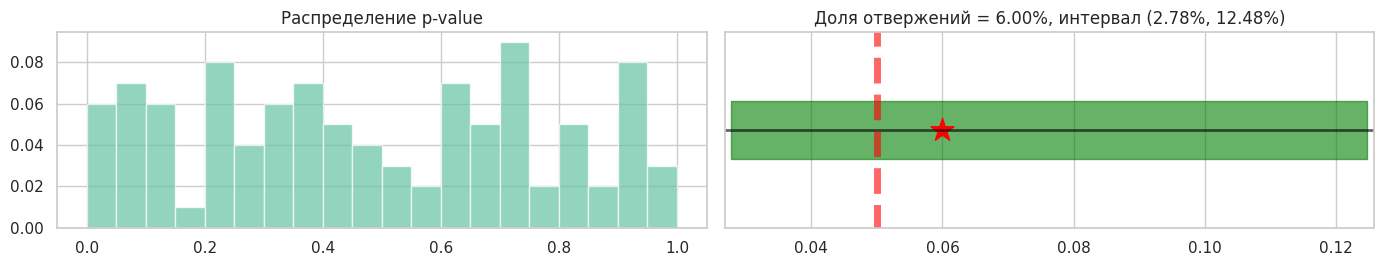

(0.06, (0.027786123963188178, 0.12476815445895921))

In [235]:
run_experiments(
    test=test,
    generate_samples=lambda sample_sizes=sample_sizes, params=[1, 1, 1, 1], distribution="normal": generate_samples(
        sample_sizes, params, distribution
    ),
    target_name=target_column,
    n_iter=100,
    alpha=alpha,
    show_pvals=True,
    draw=True,
    n_jobs=-1,
)

Увеличим n_iter до 1000

  0%|          | 0/1000 [00:00<?, ?it/s]

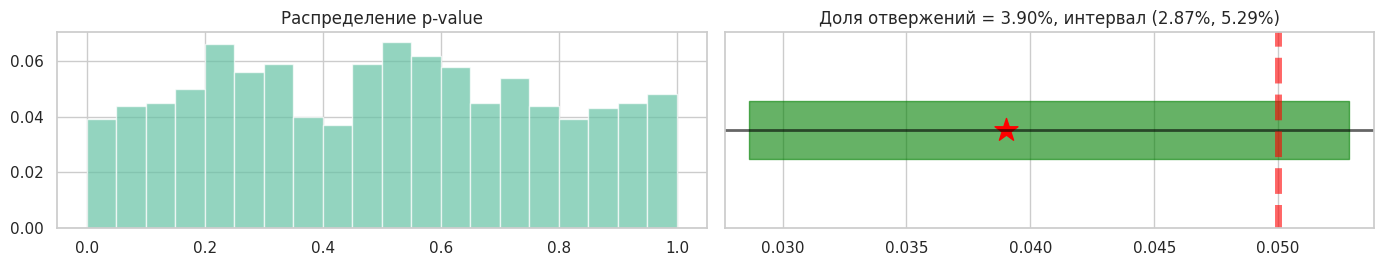

(0.039, (0.028658960904180478, 0.05286931041950135))

In [236]:
n_iter = 1000

run_experiments(
    test=test,
    generate_samples=lambda sample_sizes=sample_sizes, params=[1, 1, 1, 1], distribution="normal": generate_samples(
        sample_sizes, params, distribution
    ),
    target_name=target_column,
    n_iter=n_iter,
    alpha=alpha,
    show_pvals=True,
    draw=True,
    n_jobs=-1,
)

Экспоненциальное распределение

  0%|          | 0/1000 [00:00<?, ?it/s]

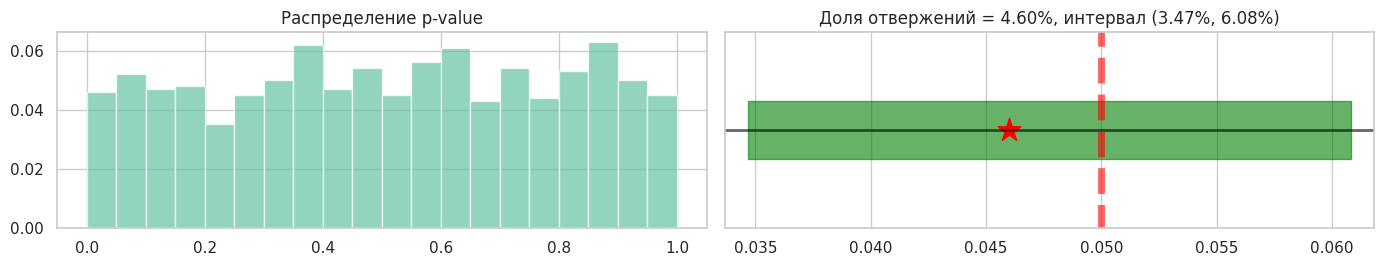

(0.046, (0.03466249276326498, 0.06081220394161907))

In [237]:
run_experiments(
    test=test,
    generate_samples=lambda sample_sizes=sample_sizes, params=[2, 2, 2, 2], distribution="exponential": generate_samples(
        sample_sizes, params, distribution
    ),
    target_name=target_column,
    n_iter=n_iter,
    alpha=alpha,
    show_pvals=True,
    draw=True,
    n_jobs=-1,
)

Проведите сравнение LSD Фишера и HSD Тьюки по *средней доле правильно отвергаемых гипотез* при двух альтернативах:
1. $\mu_1 = \mu_2 < \mu_3 = \mu_4$;
2. $\mu_1 < \mu_2 < \mu_2 < \mu_4$,

где $\mu_j$ &mdash; среднее по выборке $j$.

*Примечание.* В качестве реализации LSD Фишера можно использовать попарные t-test и последующее применение МПГ.

In [5]:
def lsd_fisher_test(samples, target_name="pilot", method="holm"):
    """
    Реализация LSD теста Фишера.

    Аргументы:
    samples -- список датафреймов с выборками
    target_name -- имя колонки с таргет-метрикой
    method -- метод поправки на множественные сравнения (по умолчанию Holm)

    Возвращает:
    results_df -- DataFrame с парами групп, t-статистиками, p-value и скорректированными p-value
    """
    group_ids = range(len(samples))  # Индексы групп
    pairs = list(combinations(group_ids, 2))  # Все пары для попарного сравнения
    p_values = []
    t_stats = []
    
    for i, j in pairs:
        # Выборки данных
        sample1 = samples[i][target_name]
        sample2 = samples[j][target_name]
        
        # Двусторонний t-тест
        t_stat, p_val = sps.ttest_ind(sample1, sample2, equal_var=False)
        t_stats.append(t_stat)
        p_values.append(p_val)
    
    # Применение поправки на множественные сравнения
    _, p_values_corrected, _, _ = multipletests(p_values, method=method)

    # Формируем таблицу результатов
    results_df = pd.DataFrame({
        "Group 1": [p[0] for p in pairs],
        "Group 2": [p[1] for p in pairs],
        "t-stat": t_stats,
        "p-value": p_values,
        "Corrected p-value": p_values_corrected
    })
    
    return np.min(results_df["Corrected p-value"])


1) Поправим функцию добавления эффекта

In [4]:
def add_effect_31(samples, effects, target_name="pilot", relative_effect=False):
    """
    Функция искусственного добавления эффекта в тестовые выборки

    Аргументы:
    samples -- выборки, 4
    effects -- добавляемые эффекты, 2

    Возвращает:
    samples -- выборки с добавленным эффектом, k + 1
    """

    samples_copy = [sample.copy() for sample in samples]

    if relative_effect:
        for sample, effect in zip(samples_copy[2:], effects):
            sample[target_name] *= 1 + effect
    else:
        for sample, effect in zip(samples_copy[2:], effects):
            sample[target_name] += effect

    return samples_copy


In [6]:
def add_effect_32(samples, effects, target_name="pilot", relative_effect=False):
    """
    Функция искусственного добавления эффекта в тестовые выборки

    Аргументы:
    samples -- выборки, 4
    effects -- добавляемые эффекты, 4

    Возвращает:
    samples -- выборки с добавленным эффектом, k + 1
    """

    samples_copy = [sample.copy() for sample in samples]

    if relative_effect:
        for sample, effect in zip(samples_copy, effects):
            sample[target_name] *= 1 + effect
    else:
        for sample, effect in zip(samples_copy, effects):
            sample[target_name] += effect

    return samples_copy

1) $\mu_1 = \mu_2 < \mu_3 = \mu_4$

Посмотрим на мощность Фишера

In [8]:
def compute_power_test(
    test, n_iter, effects_list, add_effect, sample_sizes, sigmas, alpha=0.05, relative_effect=False
):

    # Эффекты для проверки мощности

    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples=lambda sample_sizes=sample_sizes, params=sigmas, distribution="normal": generate_samples(
            sample_sizes, params, distribution
        ),
        add_effect=add_effect,
        n_iter=n_iter,
        effects_list=effects_list,
        relative_effect=relative_effect,
        n_jobs=-1,
        alpha=alpha,
        target_name=target_column,
    )

    return powers, left_bounds, right_bounds

  0%|          | 0/1000 [00:00<?, ?it/s]

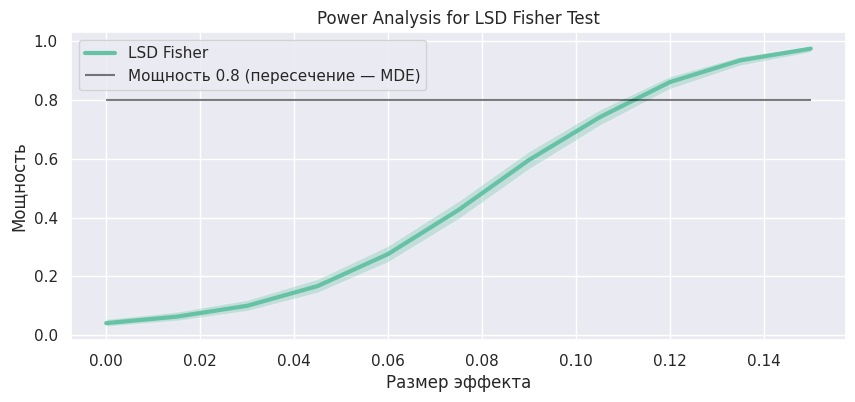

In [252]:
# Вычислим мощность при LSD
effects_list = [[x, x] for x in np.linspace(0, 0.15, 11)]
test = lambda samples: lsd_fisher_test(samples, target_name=target_column)
powers, left_bounds, right_bounds = compute_power_test(
    test, 1000, effects_list, add_effect_31, sample_sizes, sigmas, alpha
)
draw_power(
    powers,
    left_bounds,
    right_bounds,
    effects_list=np.array([x for x in np.linspace(0, 0.15, 11)]).flatten(),
    label="LSD Fisher",
    title="Power Analysis for LSD Fisher Test",
    new_figure=True,
)

  0%|          | 0/500 [00:00<?, ?it/s]

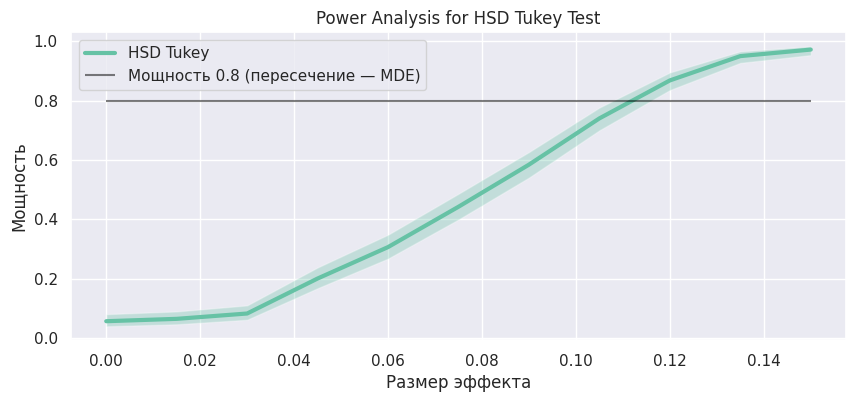

In [253]:
test = lambda samples: tukey_hsd_test(samples, target_name=target_column)
powers, left_bounds, right_bounds = compute_power_test(
    test, 500, effects_list, add_effect_31, sample_sizes, sigmas, alpha
)
draw_power(
    powers,
    left_bounds,
    right_bounds,
    effects_list=np.array([x for x in np.linspace(0, 0.15, 11)]).flatten(),
    label="HSD Tukey",
    title="Power Analysis for HSD Tukey Test",
    new_figure=True,
)

2) $\mu_1 < \mu_2 < \mu_3 < \mu_4$

  0%|          | 0/1000 [00:00<?, ?it/s]

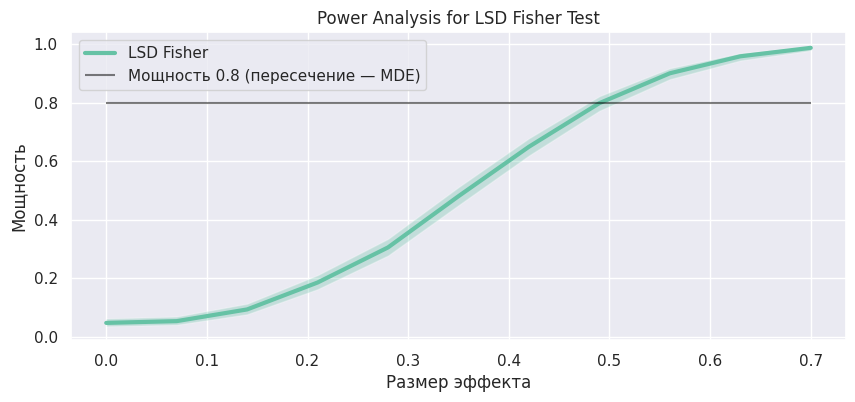

In [23]:
# Вычислим мощность при LSD
effects_list = [[x, x * 1.1, x * 1.2, x * 1.3] for x in np.linspace(0, 0.7, 11)]

test = lambda samples: lsd_fisher_test(samples, target_name=target_column)
powers, left_bounds, right_bounds = compute_power_test(
    test, 1000, effects_list, add_effect_32, sample_sizes, sigmas, alpha
)
draw_power(
    powers,
    left_bounds,
    right_bounds,
    effects_list=np.array([x for x in np.linspace(0, 0.7, 11)]).flatten(),
    label="LSD Fisher",
    title="Power Analysis for LSD Fisher Test",
    new_figure=True,
)

  0%|          | 0/500 [00:00<?, ?it/s]

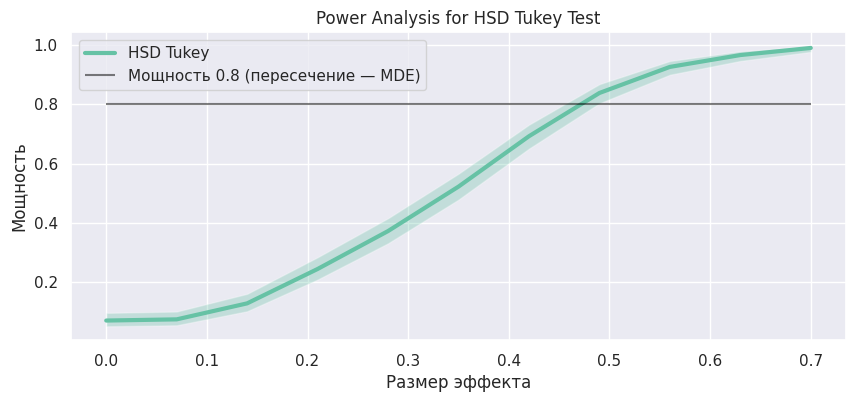

In [24]:
test = lambda samples: tukey_hsd_test(samples, target_name=target_column)
powers, left_bounds, right_bounds = compute_power_test(
    test, 500, effects_list, add_effect_32, sample_sizes, sigmas, alpha
)
draw_power(
    powers,
    left_bounds,
    right_bounds,
    effects_list=np.array([x for x in np.linspace(0, 0.7, 11)]).flatten(),
    label="HSD Tukey",
    title="Power Analysis for HSD Tukey Test",
    new_figure=True,
)

Сделайте выводы.

**Выводы**

Мы подтвердили работоспособность методов LSD Фишера и HSD Тьюки. Причем качество их работы оказалось сопоставимым.

---

### Задача 4.

Рассмотрим данные о внебрачных отношениях в контексте распределения времени между работой, временем, проведенным с супругом/супругой, и временем, проведенным с любовником/любовницей. Данные встроены в библиотеку `statsmodels`, почитать про них можно по <a href="http://www.statsmodels.org/stable/datasets/generated/fair.html">ссылке</a>.

Всего в данных содержатся результаты опроса 6366 человек. Опрос проводился в 1970-х, его анализ приведен в статье

    Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

Данные содержат следующие признаки:
* `rate_marriage` &mdash; оценка брака:
  * 1 = очень плохой, 
  * 2 = плохой, 
  * 3 = средний,      
  * 4 = хороший, 
  * 5 = очень хороший;
* `age` &mdash; возраст опрашиваемого;
* `yrs_married` &mdash; количество лет в браке;
* `children` &mdash; количество детей;
* `religious` &mdash; религиозность человека:
  * 1 = атеист, 
  * 2 = немного религиозный, 
  * 3 = вполне регилиозный,
  * 4 = строго религиозный;
* `educ` &mdash; уровень образования:
  * 9 = средняя школа, 
  * 12 = старшая школа, 
  * 14 = студент, 
  * 16 = выпускник вуза,
  * 17 = аспирант, 
  * 20 = выпускник аспирантуры;
* `occupation` &mdash; вид деятельности:
  * 1 = студент, 
  * 2 = сельское хозяйство, сельское хозяйство; полуквалифицированный или неквалифицированный рабочий; 
  * 3 = белый воротничок; 
  * 4 = педагог-консультант социальный работник, медсестра; художник, писатель; техник, квалифицированный рабочий, 
  * 5 = управленческий, административный, деловой, 
  * 6 = профессионал с ученой степенью;
* `occupation_husb` &mdash; вид деятельности супруга;
* `affairs` &mdash; доля времени, проведенного во внебрачных отношениях.

Изучите целевой признак. Каково его распределение, сколько там нулей? 

Далее нас будут интересовать только те люди, которые изменяли. Отфильтруйте данные.

In [25]:
data = sm.datasets.fair.load_pandas().data

# Convert all columns except 'affairs' to categorical
for col in data.columns:
    if col != 'affairs':
        data[col] = data[col].astype('category')

data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [26]:
data = data.loc[data["affairs"] > 0]
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


**1.** С помощью F-критерия исследуйте, по каким факторам наблюдается различие по доли времени, проведенного во внебрачных отношениях.

In [27]:
formula = "affairs ~ C(rate_marriage) + C(age) + C(yrs_married) + C(children) + C(religious) + C(educ) + C(occupation) + C(occupation_husb)"
model = smf.ols(formula, data=data).fit()

aov_table = sm.stats.anova_lm(model)

print(aov_table.round(3))

                        df     sum_sq  mean_sq       F  PR(>F)
C(rate_marriage)       4.0    144.907   36.227   4.000   0.003
C(age)                 5.0   2961.880  592.376  65.407   0.000
C(yrs_married)         6.0   2618.206  436.368  48.181   0.000
C(children)            5.0     23.116    4.623   0.510   0.769
C(religious)           3.0    142.714   47.571   5.253   0.001
C(educ)                5.0     31.208    6.242   0.689   0.632
C(occupation)          5.0     68.692   13.738   1.517   0.181
C(occupation_husb)     5.0     15.798    3.160   0.349   0.883
Residual            2014.0  18240.437    9.057     NaN     NaN


Как видим, значимыми являются оценка брака, возраст, количество лет в браке и религиозность

**2.** По факторам, для которых нашлось статистически значимое отличие, проведите post-hoc анализ для выявления уровня факторов, для которых различается целевой признак.

In [28]:
factors = ["rate_marriage", "age", "yrs_married", "religious"]

In [29]:
data_long = data.melt(id_vars=["affairs"], value_vars=factors, var_name="factor", value_name="value")
data_long.head()

,affairs,factor,value
0,0.111111,rate_marriage,3.0
1,3.230769,rate_marriage,3.0
2,1.400000,rate_marriage,4.0
3,0.727273,rate_marriage,4.0
4,4.666666,rate_marriage,5.0


In [30]:
for factor in ["rate_marriage", "age"]:
    print(f"Post-hoc для {factor}")
    posthoc_results = sp.posthoc_conover(data, val_col="affairs", group_col=factor, p_adjust="holm")
    print(posthoc_results.round(3))
    print("_" * 100)

Post-hoc для rate_marriage
       1.0    2.0    3.0    4.0    5.0
1.0  1.000  0.853  0.461  1.000  1.000
2.0  0.853  1.000  1.000  1.000  0.076
3.0  0.461  1.000  1.000  0.461  0.000
4.0  1.000  1.000  0.461  1.000  0.081
5.0  1.000  0.076  0.000  0.081  1.000
____________________________________________________________________________________________________
Post-hoc для age
       17.5   22.0  27.0   32.0   37.0   42.0
17.5  1.000  0.017   0.0  0.000  0.000  0.000
22.0  0.017  1.000   0.0  0.000  0.000  0.000
27.0  0.000  0.000   1.0  0.000  0.000  0.000
32.0  0.000  0.000   0.0  1.000  0.017  0.000
37.0  0.000  0.000   0.0  0.017  1.000  0.246
42.0  0.000  0.000   0.0  0.000  0.246  1.000
____________________________________________________________________________________________________


Видим, что статзначимые различия есть между теми кто оценивает свой брак на 3 и на 5

Между почти всеми  возрастами есть стат значимое различие

In [31]:
for factor in ["yrs_married", "religious"]:
    print(f"Post-hoc для {factor}")
    posthoc_results = sp.posthoc_conover(
        data, val_col="affairs", group_col=factor, p_adjust="holm"
    )
    print(posthoc_results.round(3))
    print("_" * 100)

Post-hoc для yrs_married
        0.5    2.5    6.0    9.0   13.0   16.5   23.0
0.5   1.000  0.014  0.000  0.000  0.000  0.000  0.000
2.5   0.014  1.000  0.000  0.000  0.000  0.000  0.000
6.0   0.000  0.000  1.000  0.005  0.000  0.000  0.000
9.0   0.000  0.000  0.005  1.000  0.019  0.000  0.000
13.0  0.000  0.000  0.000  0.019  1.000  0.019  0.000
16.5  0.000  0.000  0.000  0.000  0.019  1.000  0.014
23.0  0.000  0.000  0.000  0.000  0.000  0.014  1.000
____________________________________________________________________________________________________
Post-hoc для religious
     1.0    2.0    3.0    4.0
1.0  1.0  0.000  0.000  0.000
2.0  0.0  1.000  0.364  0.002
3.0  0.0  0.364  1.000  0.006
4.0  0.0  0.002  0.006  1.000
____________________________________________________________________________________________________


Заметим, между почти всеми годами в браке есть стат значимое различие, то же справедливо для религиозности

**3.** Изучите совместное влияние факторов "количество лет в браке" и "количество детей" с помощью двухфактороного дисперсионного анализа. Оказывают ли какие-то уровни фактора совместное влияние?

In [32]:
def calculate_rejection_rate(posthoc_results, alpha=0.05):
    """
    Вычисляет долю отвергнутых гипотез H₀ для каждого фактора.

    :param posthoc_results: Результаты post-hoc теста (pairwise_tukeyhsd)
    :param alpha: Уровень значимости (по умолчанию 0.05)
    :return: DataFrame с долей отвергнутых гипотез для каждого фактора
    """
    summary_df = pd.DataFrame(posthoc_results.summary().data[1:], 
                              columns=posthoc_results.summary().data[0])

    # Доля значимых сравнений (где p-value < alpha)
    rejection_rate = (summary_df["p-adj"] < alpha).mean()
    
    return rejection_rate

In [33]:
# Двухфакторный ANOVA с взаимодействием
formula = "affairs ~ yrs_married * children"
model = smf.ols(formula, data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

# Вывод таблицы ANOVA
print("ANOVA Table:\n", aov_table.round(3))

# Если хотя бы для одного фактора p-value < 0.05, проводим post-hoc анализ
rejection_rates = {}

if (aov_table["PR(>F)"] < 0.05).any():
    # Post-hoc анализ для "yrs_married"
    print("\nPost-hoc Tukey HSD for 'yrs_married':")
    tukey_yrs = pairwise_tukeyhsd(data["affairs"], data["yrs_married"])
    print(tukey_yrs)
    rejection_rates["yrs_married"] = calculate_rejection_rate(tukey_yrs)

    # Post-hoc анализ для "children"
    print("\nPost-hoc Tukey HSD for 'children':")
    tukey_children = pairwise_tukeyhsd(data["affairs"], data["children"])
    print(tukey_children)
    rejection_rates["children"] = calculate_rejection_rate(tukey_children)

    # Post-hoc анализ для взаимодействия "yrs_married * children"
    print("\nPost-hoc Tukey HSD for interaction 'yrs_married * children':")
    data["interaction"] = data["yrs_married"].astype(str) + "_" + data["children"].astype(str)
    tukey_interaction = pairwise_tukeyhsd(data["affairs"], data["interaction"])
    print(tukey_interaction)
    rejection_rates["interaction"] = calculate_rejection_rate(tukey_interaction)

ANOVA Table:
                          sum_sq      df      F  PR(>F)
yrs_married               0.000     6.0  0.000   1.000
children                 -0.000     5.0 -0.000   1.000
yrs_married:children    198.058    30.0  0.722   0.486
Residual              18489.475  2022.0    NaN     NaN


Как видим, ни один из факторов не вносит стат значимого влияния

In [34]:
# Вывод долей отвержения гипотез
print("\nСредняя доля отвергнутых гипотез по каждому фактору:")
for factor, rate in rejection_rates.items():
    print(f"{factor}: {rate:.2%}")


Средняя доля отвергнутых гипотез по каждому фактору:


Как видим, как по отдельности, так и в совокупности, некоторые комбинации не являются стат значимыми в плане долготы измены.


**4.** Ответьте на предыдущий вопрос, сняв возможную зависимость от возраста человека и его религиозности, используя их в качестве ковариат.

In [35]:
formula_ancova = "affairs ~ yrs_married * children + age + religious"
model_ancova = smf.ols(formula_ancova, data=data).fit()
aov_table_ancova = sm.stats.anova_lm(model_ancova, typ=2)

print("ANCOVA Results:")
print(aov_table_ancova.round(3))

rejection_rates = {}

if (aov_table_ancova["PR(>F)"] < 0.05).any():
    # Post-hoc анализ для "yrs_married"
    print("\nPost-hoc Tukey HSD for 'yrs_married':")
    tukey_yrs = pairwise_tukeyhsd(data["affairs"], data["yrs_married"])
    print(tukey_yrs)
    rejection_rates["yrs_married"] = calculate_rejection_rate(tukey_yrs)

    # Post-hoc анализ для "children"
    print("\nPost-hoc Tukey HSD for 'children':")
    tukey_children = pairwise_tukeyhsd(data["affairs"], data["children"])
    print(tukey_children)
    rejection_rates["children"] = calculate_rejection_rate(tukey_children)

    # Post-hoc анализ для взаимодействия "yrs_married * children"
    print("\nPost-hoc Tukey HSD for interaction 'yrs_married * children':")
    data["interaction"] = (
        data["yrs_married"].astype(str) + "_" + data["children"].astype(str)
    )
    tukey_interaction = pairwise_tukeyhsd(data["affairs"], data["interaction"])
    print(tukey_interaction)
    rejection_rates["interaction"] = calculate_rejection_rate(tukey_interaction)

ANCOVA Results:
                         sum_sq      df       F  PR(>F)
yrs_married            1999.114     6.0  36.632   0.000
children                  0.000     5.0   0.000   1.000
age                      18.603     5.0   0.409   0.843
religious               147.181     3.0   5.394   0.001
yrs_married:children    243.246    30.0   0.891   0.345
Residual              18318.159  2014.0     NaN     NaN

Post-hoc Tukey HSD for 'yrs_married':
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.5    2.5  -8.0743    0.0 -10.3447 -5.8039   True
   0.5    6.0 -10.4522    0.0  -12.728 -8.1765   True
   0.5    9.0 -10.8896    0.0 -13.1889 -8.5902   True
   0.5   13.0 -11.4037    0.0 -13.7061 -9.1013   True
   0.5   16.5 -11.5639    0.0 -13.8419 -9.2859   True
   0.5   23.0 -11.7698    0.0 -14.0511 -9.4886   True
   2.5    6.0  -2.3779    0.0  -2.9999 -1.7559   True
   2.5    9.0

Видим, что ANOVA table поменялась, и тепер yrs_marriage является статистически значимым фактором

In [36]:
# Вывод долей отвержения гипотез
print("\nСредняя доля отвергнутых гипотез по каждому фактору:")
for factor, rate in rejection_rates.items():
    print(f"{factor}: {rate:.2%}")


Средняя доля отвергнутых гипотез по каждому фактору:
yrs_married: 71.43%
children: 60.00%
interaction: 15.91%


После добавления ковариат yrs_married стало стат значимым

**5.** По результатам исследования сделайте выводы о семейной жизни.

**Выводы**

Как видим, основным фактором влияющим на продолжительность измены является продолжительность брака, религиозность возраст и оценка самого брака.

В задании мы увидели, что важно учитывать дополнительные факторы, чтобы обнаружить основную зависимость (как это было в пункте 4)